<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_6_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 6**: Predicting Bike Sharing Demand with Neural Networks





In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

# 1. Load and preprocess the [Bike Sharing dataset](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset) **[1 Marks]**

*   Check for missing and duplicate values
*   Remove it (If found)

In [14]:
dataset = pd.read_csv('https://raw.githubusercontent.com/NehaKumari500092077/Machine-Learning-Lab/main/hour.csv')
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
#drop instant, dteday, casual, and registered column
dataset = dataset.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
dataset.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [16]:
# Check Duplicates
duplicate_values = dataset.duplicated().sum()
print("No. of duplicate values: ",duplicate_values)

# Remove duplicate values
dataset = dataset.drop_duplicates()
print("No. of duplicate values: ",dataset.duplicated().sum())

# Check for missing values
missing_values = dataset.isnull().sum()
print("No. of missing values: ",missing_values)
# As there is no missing values present in the dataset so no need to remove it

No. of duplicate values:  2
No. of duplicate values:  0
No. of missing values:  season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


# 2. Data Pre-processing **[1 Marks]**

*   Perform one-hot encoding of the categorical features when necessary (not necessary if there is a natural ordering between categories)
*   Perform feature scaling



In [17]:
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
continuous_features = ['temp', 'atemp', 'hum', 'windspeed']

# Perform one-hot encoding on categorical features
encoded_dataset = pd.get_dummies(dataset, columns=categorical_features, drop_first=True)

# Perform feature scaling on continuous features
scaler = StandardScaler()
encoded_dataset[continuous_features] = scaler.fit_transform(dataset[continuous_features])

# 3. Data Splitting **[1  Marks]**

*   Divide the data into training, validation and test sets (70%-15%-15%).



In [18]:
# Seperate features and target
X = encoded_dataset.drop('cnt', axis=1)
Y = encoded_dataset['cnt']

# Split data into training, validation and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


# 4. Model Design: Design a neural network having N hidden layers **[7  Marks]**  

*   The number of units in each hidden layer as 128, 64, 32, and so on
*   Activation function in each hidden layer: ReLU
*   What activation function should you choose for the output layer for this prediction problem?



In [22]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values.astype(np.float32), dtype=torch.float32)
y_train_tensor = torch.tensor(Y_train.values.astype(np.float32), dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values.astype(np.float32), dtype=torch.float32)
y_val_tensor = torch.tensor(Y_val.values.astype(np.float32), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values.astype(np.float32), dtype=torch.float32)
y_test_tensor = torch.tensor(Y_test.values.astype(np.float32), dtype=torch.float32)

# Create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)



In [23]:

print("Dataset sizes:")
print(f"Training set: {len(train_dataset)}")
print(f"Validation set: {len(val_dataset)}")
print(f"Test set: {len(test_dataset)}")

Dataset sizes:
Training set: 12163
Validation set: 2607
Test set: 2607


In [24]:
# Create dataloaders

batch_size_train = len(train_dataset)
batch_size_val = len(val_dataset)
batch_size_test = len(test_dataset)

train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size_val)
test_loader = DataLoader(test_dataset, batch_size=batch_size_test)

Testing hidden layer configuration: [128, 64, 32]
Epoch 0: Train Loss = 70502.7578125, Val Loss = 63659.8828125
Epoch 10: Train Loss = 69446.4375, Val Loss = 62700.80078125
Epoch 20: Train Loss = 67835.15625, Val Loss = 60986.21875
Epoch 30: Train Loss = 66807.5703125, Val Loss = 60205.03515625
Epoch 40: Train Loss = 65237.9453125, Val Loss = 58500.97265625
Epoch 50: Train Loss = 64604.97265625, Val Loss = 58118.4140625
Epoch 60: Train Loss = 57470.609375, Val Loss = 32705.169921875
Epoch 70: Train Loss = 60068.58203125, Val Loss = 53858.65625
Epoch 80: Train Loss = 59037.77734375, Val Loss = 52891.796875
Epoch 90: Train Loss = 58047.421875, Val Loss = 51964.046875
Final validation loss for [128, 64, 32]: 51161.23046875
Testing hidden layer configuration: [128, 64]
Epoch 0: Train Loss = 70582.1953125, Val Loss = 63686.703125
Epoch 10: Train Loss = 69785.953125, Val Loss = 63007.80859375
Epoch 20: Train Loss = 125476.84375, Val Loss = 76863.6875
Epoch 30: Train Loss = 67390.8671875, Val

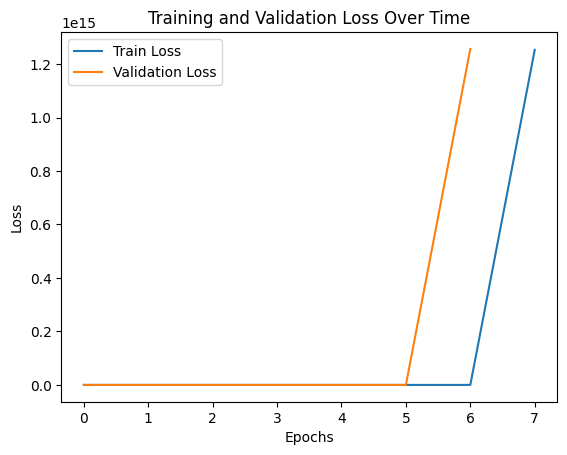

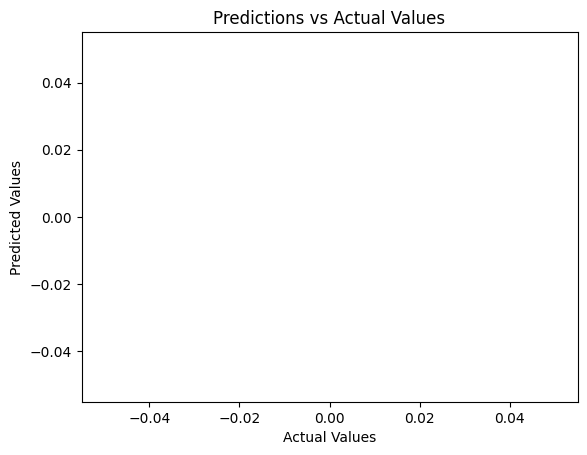

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Build the neural network architecture
class CustomNN(nn.Module):
    def __init__(self, input_dim, hidden_layers, output_dim):
        super(CustomNN, self).__init__()
        layers = []

        # Construct hidden layers with ReLU activation
        for layer_size in hidden_layers:
            layers.append(nn.Linear(input_dim, layer_size))
            layers.append(nn.ReLU())
            input_dim = layer_size

        # Add output layer (linear activation for regression)
        layers.append(nn.Linear(input_dim, output_dim))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Step 2: Function to train the model
def train_network(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    training_losses = []
    validation_losses = []

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        total_train_loss = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            predictions = model(inputs)
            loss = criterion(predictions.squeeze(), labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        training_losses.append(total_train_loss / len(train_loader))

        # Validate the model
        model.eval()  # Set the model to evaluation mode
        total_val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                predictions = model(inputs)
                total_val_loss += criterion(predictions.squeeze(), labels).item()
        validation_losses.append(total_val_loss / len(val_loader))

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Train Loss = {training_losses[-1]}, Val Loss = {validation_losses[-1]}")

    return training_losses, validation_losses

# Step 3: Cross-validation to determine the optimal network configuration
def perform_cross_validation(layer_configs):
    lowest_val_loss = float('inf')
    optimal_model = None
    optimal_config = None

    for layer_config in layer_configs:
        print(f"Testing hidden layer configuration: {layer_config}")
        model = CustomNN(input_dim=X_train.shape[1], hidden_layers=layer_config, output_dim=1)
        criterion = nn.MSELoss()
        optimizer = optim.SGD(model.parameters(), lr=0.001)

        train_losses, val_losses = train_network(model, criterion, optimizer, train_loader, val_loader, num_epochs=100)

        last_val_loss = val_losses[-1]
        print(f"Final validation loss for {layer_config}: {last_val_loss}")

        if last_val_loss < lowest_val_loss:
            lowest_val_loss = last_val_loss
            optimal_model = model
            optimal_config = layer_config

    if optimal_model is None:
        raise ValueError("Cross-validation did not find any valid model.")

    return optimal_model, optimal_config


# Step 4: Specify different hidden layer configurations
layer_configs = [
    [128, 64, 32],
    [128, 64],
    [128],
    [64, 32]
]

optimal_model, optimal_config = perform_cross_validation(layer_configs)
print(f"Optimal configuration: {optimal_config}")


# Step 5: Function to evaluate the model on the test data
def evaluate_model_performance(model, test_loader):
    if model is None:
        raise ValueError("Model is not properly selected or trained.")

    model.eval()  # Switch to evaluation mode
    actual_values = []
    predicted_values = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            predictions = model(inputs)
            actual_values.extend(labels.numpy())
            predicted_values.extend(predictions.squeeze().numpy())

    test_mse = mean_squared_error(actual_values, predicted_values)
    return test_mse


# Check if an optimal model exists, then evaluate it
if optimal_model is not None:
    test_mse = evaluate_model_performance(optimal_model, test_loader)
    print(f"Test set Mean Squared Error: {test_mse}")
else:
    print("No valid model was identified.")


# Step 6: Function to plot training and validation loss
def visualize_losses(train_losses, val_losses):
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss Over Time')
    plt.show()

train_losses, val_losses = train_network(optimal_model, nn.MSELoss(), optim.SGD(optimal_model.parameters(), lr=0.01), train_loader, val_loader, num_epochs=100)
visualize_losses(train_losses, val_losses)


# Step 7: Create a scatter plot of predicted vs actual values
def plot_predictions_vs_actual(model, test_loader):
    model.eval()
    true_values = []
    predicted_values = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            predictions = model(inputs)
            true_values.extend(labels.numpy())
            predicted_values.extend(predictions.squeeze().numpy())

    plt.scatter(true_values, predicted_values)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predictions vs Actual Values')
    plt.show()

plot_predictions_vs_actual(optimal_model, test_loader)


# 5. Cost function: Define a cost function suitable for this problem **[3  Marks]**

*   Use the SGD optimizer to optimize this cost function using backpropagation.



# 6. Perform cross-validation to find the best value of N using grid search. **[2  Marks]**



# 7. Loss Plots: **[1 Marks]**

*  Plot the training and validation losses for each value of N (on the same
graph).



# 8. What is the *best value of the number of hidden layers (N)* for this problem? Justify your answer. **[2  Marks]**



# 9. For the model trained with the best value of N that you reported in the previous question, *report the MSE on the test set*.  **[1  Marks]**




# 10. Show a *scatter plot of the predictions against the true values* for the predictions for the best model that you obtained. **[1  Marks]**